     X   Y
0   47  13
1   50  36
2   27  36
3   26  15
4   38  33
..  ..  ..
65  50  46
66  11  23
67   5  31
68  21  50
69  22  45

[70 rows x 2 columns]
This dataframe has 70 rows
This dataframe has 2 columns
RangeIndex(start=0, stop=70, step=1)

--DF HEADERS--
    X   Y
0  47  13
1  50  36
2  27  36
3  26  15
4  38  33

--DF Summmary--
               X          Y
count  70.000000  70.000000
mean   27.785714  24.928571
std    14.674135  14.640941
min     1.000000   1.000000
25%    18.000000  12.000000
50%    27.000000  25.500000
75%    41.000000  37.000000
max    50.000000  50.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X       70 non-null     int64
 1   Y       70 non-null     int64
dtypes: int64(2)
memory usage: 1.2 KB
None

--Unique Values Vs Nulls--
X    38
Y    38
dtype: int64
X    38
Y    38
dtype: int64


--DF Min and Max Values--
X    1


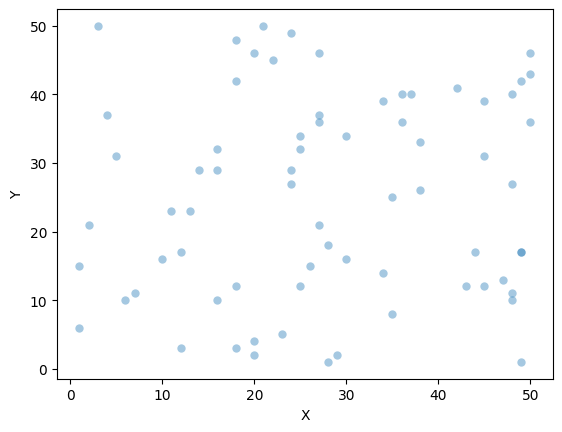

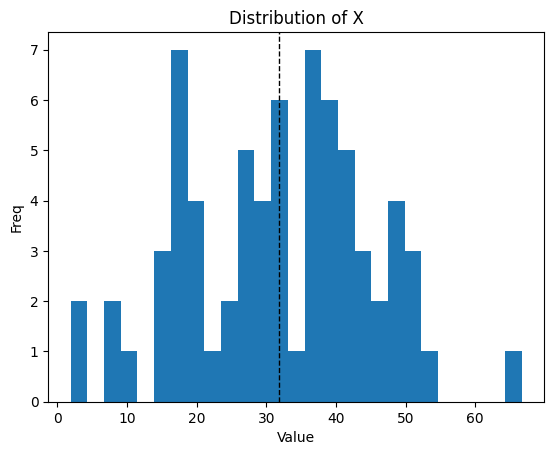

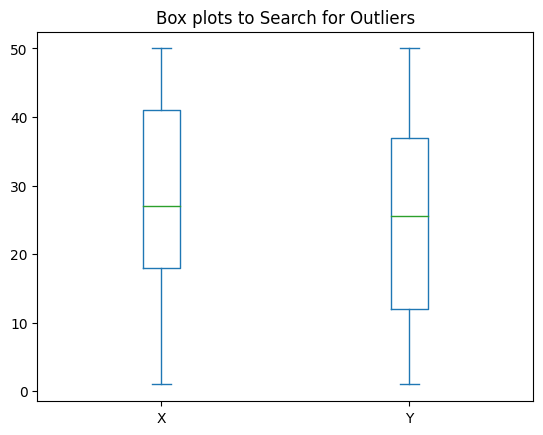

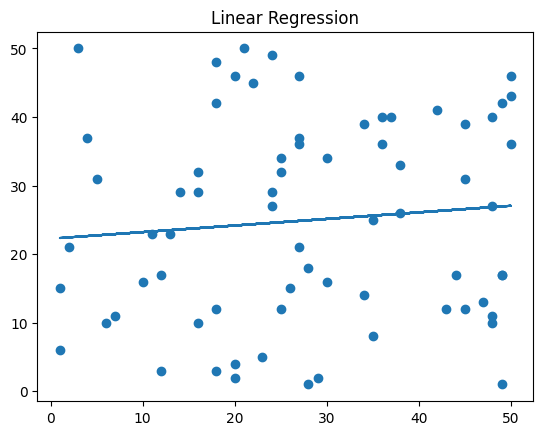

Slope = 0.09590450413203273
Intercept =  22.26379627804566
The R Value = 0.09612193927462738


In [86]:
##Libraries to start with
################################
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
# from sklearn.metrics import r2_score
# from sklearn import linear_model
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

##############################

##Descriptive Analysis###

df = pd.read_csv('Data.csv')

##Descriptive Analysis###

def df_summary(df):
    print(f'This dataframe has', df.shape[0] , 'rows')  
    print(f'This dataframe has', df.shape[1] , 'columns') 
    print(df.index)
    print()
    print('--DF HEADERS--')
    print(df.head())
    print()
    print('--DF Summmary--')
    print(df.describe(include = 'all'))
    print()
    print(df.info())
    print()
    print('--Unique Values Vs Nulls--')
    print(df.nunique())
    print(df.nunique(dropna=False))
    print()
    print()
    print('--DF Min and Max Values--')
    print (df.min())
    print (df.max())

## How does the data look?##
def scatter_plot(df,x,y):
    ##What Variables Do we want to Look at##
    plt.figure()
    sns.scatterplot(data=df, x=x,y=y,alpha=.4, linewidth=0)
    print(f'For X, Mean = ',np.mean(x),'Mode =', stats.mode(x),'Std Dev =',np.std(x),'Var = ',np.var(x))
    print(f'For Y, Mean = ',np.mean(y),'Mode =', stats.mode(y),'Std Dev =',np.std(y),'Var = ',np.var(y))

##How is the data Distributed?##
def distribution(df,x):
    plt.figure()
    plt.xlabel('Value')
    plt.ylabel('Freq')
    plt.title('Distribution of X')
    mean = int(np.mean(df[x]))
    std_dev = int(np.std(df[x]))
    size = int(df[x].shape[0])
    var= np.random.normal(mean,std_dev,size)
    plt.hist(var,mean)
    plt.axvline(var.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.show()
    

##Outliers##
def boxplot(df):
    df.plot(kind = 'box')
    plt.title('Box plots to Search for Outliers')
    plt.show()
    
##Regressions##
def linear_regression(x,y):
    slope, intercept, r, p, std_err = stats.linregress(x, y) ## building the informaiton for the regression
    def func(x):
        return slope * x + intercept ## Bulding the slope of the line. (Where on the Y Axis the X value is placed)
    model = list(map(func,x))   #Building out the model from the function above)
    plt.scatter(x,y)            # Building the scatter plot of the data to show the line. 
    plt.plot(x,model)        ## plotting 
    plt.title('Linear Regression')
    plt.show()
    print(f'Slope =', slope)
    print(f'Intercept = ', intercept)
    ## Very important in determing if the relationship is significant or not. -1 to 1 means 100% related either positve or negative)
    print(f'The R Value =', r)
    
def polynomial_reg(x,y):
    model = np.poly1d(np.polyfit(x,y,3)) #method that lets us make a polynomial model
    line = np.linspace(1,22,100)  #specify how the line will display, we start at position 1, and end at position 22:
    plt.scatter(x, y)  #Draw the original scatter plot with X and Y variables. 
    plt.plot(line,model(line))  #This creates the line for the polynomial regression.
    plt.show()
    print(r2_score(y,model(x))) ## Prints the r2 scrore, 0 -1 0 = no relationship 1 = perfect relationship.   
    
def multiple_regression(x,y):
    regression = linear_model.LinearRegression()
    regression.fit(x,y)   ##Method to describe the relationship
    print(regr.coef_)

## Clusters ###
    
def k_means(x,y):
    data = list(zip(x, y))
    inertias = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    plt.plot(range(1,11), inertias, marker='o')
    plt.title('Ideal Cluster Search')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.show()
    
## AFter you find the ideal number of clusters to group##
def clusters_visual(x,y,clusters):
    data = list(zip(x, y))
    kmeans = KMeans(n_clusters=clusters)
    kmeans.fit(data)
    plt.scatter(x, y, c=kmeans.labels_)
    plt.show()
    
### Outputs #####
print(df) 
df_summary(df)
scatter_plot(df,df['X'],df['Y'])
distribution(df,'X')
boxplot(df)
linear_regression(df['X'],df['Y'])
# polynomial_reg (df['X'],df['Y'])

##Mutplie Regression##
# x = df[['X']] ##Include all independant variables from the DF.
# y = df['Y']
# multiple_regression(x,y)
# Predict = regression.predict([[2300,1300]])
# print(Predict)

# ##Cluster Analysis
# k_means(df['X'],df['Y'])
# clusters_visual(df['X'],df['Y'],2)




